In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

dataset = pd.read_csv('machine.csv', sep=',')

print(dataset.keys())

Index(['adviser', '32/60', '125', '256', '6000', '256.1', '16', '128', '198',
       '199'],
      dtype='object')


In [12]:
dataframe = pd.DataFrame(dataset)
dataframe.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [13]:
dataframe = dataframe.replace('?', np.nan)
dataframe = dataframe.dropna()
dataframe.isnull().sum()

adviser    0
32/60      0
125        0
256        0
6000       0
256.1      0
16         0
128        0
198        0
199        0
dtype: int64

In [ ]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = dataframe.copy()
data_scale ['adviser'] = scale(data_scale['adviser'])
data_scale['32/60'] = scale(data_scale['32/60'])
data_scale ['125'] = scale(data_scale['125'])
data_scale ['256'] = scale(data_scale['256'])
data_scale['6000'] = scale(data_scale['6000'])
data_scale ['256.1'] = scale(data_scale['256.1'])
data_scale['16'] = scale(data_scale['16'])
data_scale ['128'] = scale(data_scale['128'])
data_scale ['198'] = scale(data_scale['198'])
data_scale['199'] = scale(data_scale['199'])

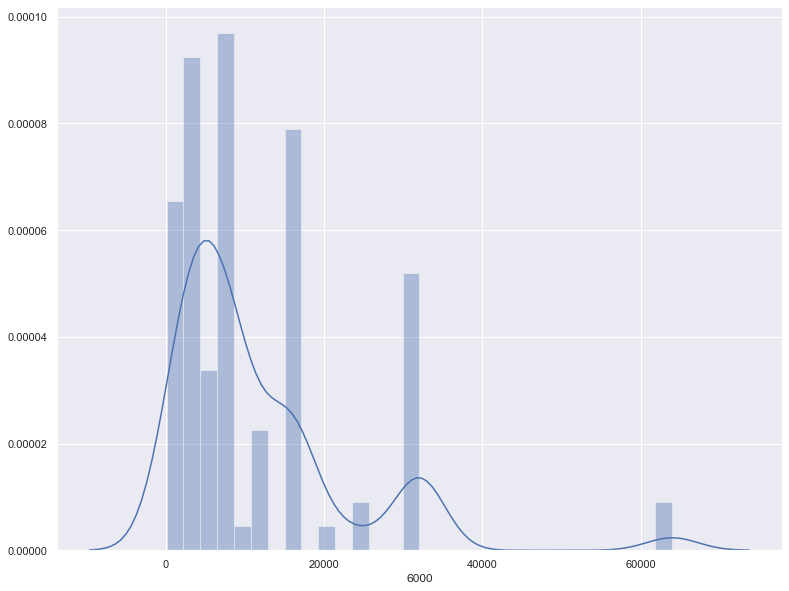

In [16]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(dataframe['6000'], bins=30)
plt.show()

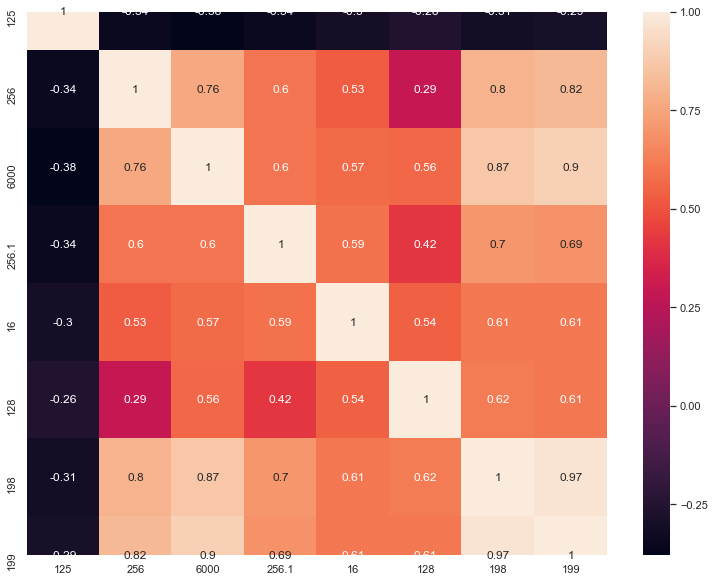

In [17]:
feature_corr = dataframe.corr().round(2)
sns.heatmap(data=feature_corr, annot=True)

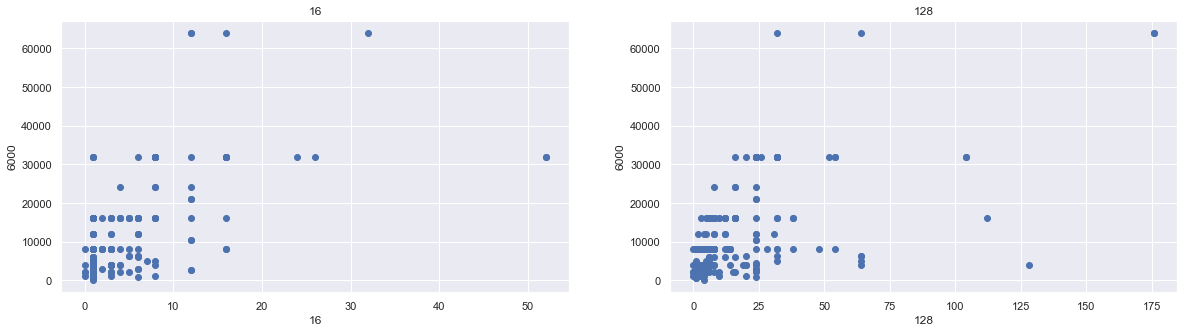

In [18]:
plt.figure(figsize=(20, 5))

target = dataframe['6000']

selected_features = ['16', '128']

for i, col in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    x = dataframe[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('6000')

In [19]:
X = pd.DataFrame(np.c_[dataframe['16'], dataframe['128']], columns = ['16','128'])
Y = dataframe['6000']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [21]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mse(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("Training : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

Y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mse(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("Testing : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

Training : 
RMSE :  8854.646103529974
R2 :  0.4532039300271936


Testing : 
RMSE :  9635.286496826238
R2 :  0.1468017001722175




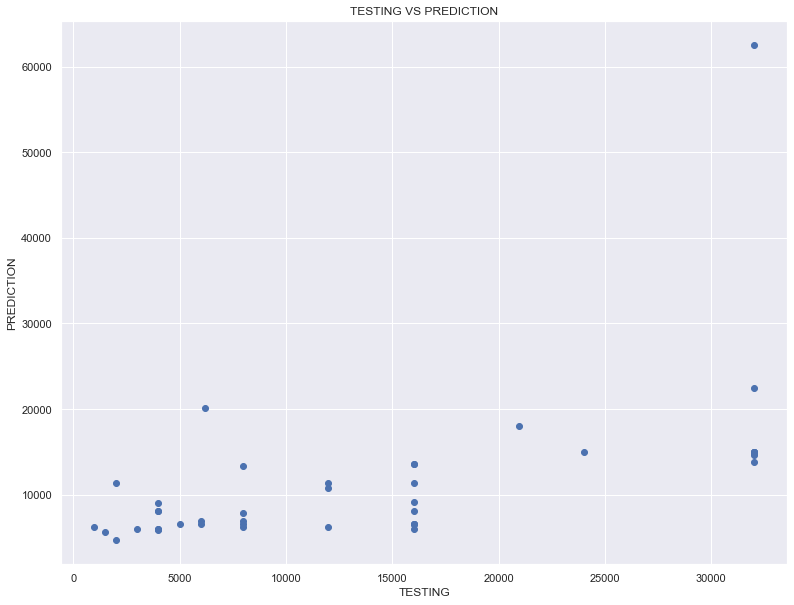

In [22]:
plt.scatter(Y_test, Y_test_predict)
plt.xlabel('TESTING')
plt.ylabel('PREDICTION')
plt.title('TESTING VS PREDICTION')
plt.show()